# HW3_Q7_Chami

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# load dataset
X_train = pd.read_csv("trainData.csv", header=None)
y_train = pd.read_csv("trainLabels.csv", header=None).values.ravel()

X_test = pd.read_csv("testData.csv", header=None)
y_test = pd.read_csv("testLabels.csv", header=None).values.ravel()

n_features = X_train.shape[1]
feature_names = list(range(n_features))

In [3]:
# CCR function
def evaluate_ccr(feature_subset):
    model = GaussianNB()
    model.fit(X_train.iloc[:, feature_subset], y_train)
    y_pred = model.predict(X_test.iloc[:, feature_subset])
    return accuracy_score(y_test, y_pred) * 100

In [4]:
# forward selection
def forward_selection():
    selected_features = []
    remaining_features = feature_names.copy()
    results = []

    print("\n===== FORWARD SELECTION =====")

    while remaining_features:
        best_feature = None
        best_ccr = 0

        for f in remaining_features:
            candidate_features = selected_features + [f]
            ccr = evaluate_ccr(candidate_features)

            if ccr > best_ccr:
                best_ccr = ccr
                best_feature = f

        if best_feature is None:
            break

        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        results.append((selected_features.copy(), best_ccr))

        print(f"Step {len(selected_features)}: Added feature {best_feature} → CCR = {best_ccr:.2f}%")

    return results

# backward elimination
def backward_elimination():
    selected_features = feature_names.copy()
    results = []

    print("\n===== BACKWARD ELIMINATION =====")

    while len(selected_features) > 1:
        best_ccr = 0
        feature_to_remove = None

        for f in selected_features:
            candidate_features = selected_features.copy()
            candidate_features.remove(f)
            ccr = evaluate_ccr(candidate_features)

            if ccr > best_ccr:
                best_ccr = ccr
                feature_to_remove = f

        if feature_to_remove is None:
            break

        selected_features.remove(feature_to_remove)
        results.append((selected_features.copy(), best_ccr))

        print(f"Remaining {len(selected_features)} features, removed {feature_to_remove} → CCR = {best_ccr:.2f}%")

    return results


===== FORWARD SELECTION =====


C:\Users\AMIR HOSSEIN\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\AMIR HOSSEIN\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\AMIR HOSSEIN\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\AMIR HOSSEIN\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\AMIR HOSSEIN\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\AMIR 

Step 1: Added feature 35 → CCR = 22.12%
Step 2: Added feature 102 → CCR = 30.88%
Step 3: Added feature 91 → CCR = 38.32%
Step 4: Added feature 106 → CCR = 45.08%
Step 5: Added feature 131 → CCR = 49.48%
Step 6: Added feature 89 → CCR = 53.48%
Step 7: Added feature 49 → CCR = 57.36%
Step 8: Added feature 104 → CCR = 60.80%
Step 9: Added feature 47 → CCR = 63.56%
Step 10: Added feature 65 → CCR = 65.20%
Step 11: Added feature 132 → CCR = 66.96%
Step 12: Added feature 63 → CCR = 68.80%
Step 13: Added feature 74 → CCR = 69.96%
Step 14: Added feature 133 → CCR = 71.64%
Step 15: Added feature 52 → CCR = 72.32%
Step 16: Added feature 162 → CCR = 73.44%
Step 17: Added feature 135 → CCR = 74.00%
Step 18: Added feature 76 → CCR = 74.68%
Step 19: Added feature 77 → CCR = 75.44%
Step 20: Added feature 78 → CCR = 75.96%
Step 21: Added feature 144 → CCR = 76.64%
Step 22: Added feature 149 → CCR = 76.80%
Step 23: Added feature 116 → CCR = 76.96%
Step 24: Added feature 61 → CCR = 77.28%
Step 25: Added

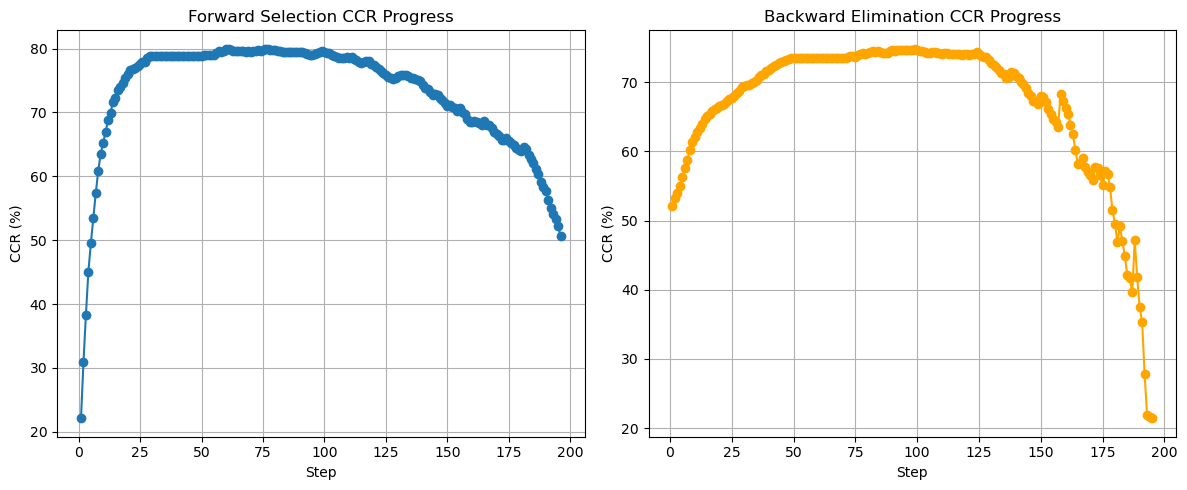

In [5]:
# run
forward_results = forward_selection()
backward_results = backward_elimination()

# best subsets per method
best_forward_features, best_forward_ccr = max(forward_results, key=lambda x: x[1])
best_backward_features, best_backward_ccr = max(backward_results, key=lambda x: x[1])

print("\n===== BEST FORWARD SELECTION RESULT =====")
print(f"Features: {best_forward_features}")
print(f"Best CCR: {best_forward_ccr:.2f}%")

print("\n===== BEST BACKWARD ELIMINATION RESULT =====")
print(f"Features: {best_backward_features}")
print(f"Best CCR: {best_backward_ccr:.2f}%")

# plot
forward_ccr = [r[1] for r in forward_results]
backward_ccr = [r[1] for r in backward_results]

plt.figure(figsize=(12, 5))

# Forward plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(forward_ccr) + 1), forward_ccr, marker='o')
plt.xlabel("Step")
plt.ylabel("CCR (%)")
plt.title("Forward Selection CCR Progress")
plt.grid(True)

# Backward plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(backward_ccr) + 1), backward_ccr, marker='o', color='orange')
plt.xlabel("Step")
plt.ylabel("CCR (%)")
plt.title("Backward Elimination CCR Progress")
plt.grid(True)

plt.tight_layout()
plt.show()